Primero importamos la librería de pandas y numpy

In [19]:
import pandas as pd
import numpy as np

Asignamos los paths donde encontramos nuestros data sets

In [3]:
red_wine_ds = "./Wine/winequality-red.csv"
white_wine_ds = "./Wine/winequality-white.csv"

Asignamos a la variable headers los encabezados de las columnas

In [11]:
encabezados = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

Leemos nuestros archivos csv y los asignamos en las variables de data frames con la librería de pandas, además agregamos los separadores del archivo csv y los encabezados

In [15]:
df_red = pd.read_csv(red_wine_ds, sep=";", names= encabezados)
df_white = pd.read_csv(white_wine_ds, sep=";", names= encabezados)

utilizamos el método "head()" para ver nuestros primeros 5 registros en nuestros data sets

In [17]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


reemplazamos los "question marks" por el valor de Nan de numpy si es que existen

In [20]:
df_red.replace("?", np.nan, inplace = True)
df_white.replace("?", np.nan, inplace = True)

Almacenamos los valores nulos de nuestros data sets en 2 variables

In [21]:
missing_data_1 = df_red.isnull()
missing_data_2 = df_white.isnull()

Hacemos un conteo de los valores faltantes en nuestros data sets

In [22]:
for column in missing_data_1.columns.values.tolist():
    print(column)
    print (missing_data_1[column].value_counts())
    print("")    

fixed acidity
False    1599
Name: fixed acidity, dtype: int64

volatile acidity
False    1599
Name: volatile acidity, dtype: int64

citric acid
False    1599
Name: citric acid, dtype: int64

residual sugar
False    1599
Name: residual sugar, dtype: int64

chlorides
False    1599
Name: chlorides, dtype: int64

free sulfur dioxide
False    1599
Name: free sulfur dioxide, dtype: int64

total sulfur dioxide
False    1599
Name: total sulfur dioxide, dtype: int64

density
False    1599
Name: density, dtype: int64

pH
False    1599
Name: pH, dtype: int64

sulphates
False    1599
Name: sulphates, dtype: int64

alcohol
False    1599
Name: alcohol, dtype: int64

quality
False    1599
Name: quality, dtype: int64



In [23]:
for column in missing_data_2.columns.values.tolist():
    print(column)
    print (missing_data_2[column].value_counts())
    print("")   

fixed acidity
False    4898
Name: fixed acidity, dtype: int64

volatile acidity
False    4898
Name: volatile acidity, dtype: int64

citric acid
False    4898
Name: citric acid, dtype: int64

residual sugar
False    4898
Name: residual sugar, dtype: int64

chlorides
False    4898
Name: chlorides, dtype: int64

free sulfur dioxide
False    4898
Name: free sulfur dioxide, dtype: int64

total sulfur dioxide
False    4898
Name: total sulfur dioxide, dtype: int64

density
False    4898
Name: density, dtype: int64

pH
False    4898
Name: pH, dtype: int64

sulphates
False    4898
Name: sulphates, dtype: int64

alcohol
False    4898
Name: alcohol, dtype: int64

quality
False    4898
Name: quality, dtype: int64



Como podemos observar no encontramos valores faltantes en nuestros data sets

Ahora procedemos a ver los tipos de datos en nuestros data sets

In [25]:
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [26]:
df_white.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Como pudimos observar nuestros data frames tienen los tipos de datos correctos para cada una de sus columnas

Ahora vamos a crear categorias para la columna de calidad

In [27]:
bins_1 = np.linspace(min(df_red["quality"]), max(df_red["quality"]), 4)
bins_1

array([3.        , 4.66666667, 6.33333333, 8.        ])

In [28]:
bins_2 = np.linspace(min(df_white["quality"]), max(df_white["quality"]), 4)
bins_2

array([3., 5., 7., 9.])

ponemos los nombres de los grupos

In [29]:
group_names = ['Low', 'Medium', 'High']

In [30]:
df_red['quality-binned'] = pd.cut(df_red['quality'], bins_1, labels=group_names, include_lowest=True )
df_red[['quality','quality-binned']].head(20)

,quality,quality-binned
0,5,Medium
1,5,Medium
2,5,Medium
3,6,Medium
4,5,Medium
5,5,Medium
6,5,Medium
7,7,High
8,7,High
9,5,Medium


In [31]:
df_white['quality-binned'] = pd.cut(df_white['quality'], bins_2, labels=group_names, include_lowest=True )
df_white[['quality','quality-binned']].head(20)

,quality,quality-binned
0,6,Medium
1,6,Medium
2,6,Medium
3,6,Medium
4,6,Medium
5,6,Medium
6,6,Medium
7,6,Medium
8,6,Medium
9,6,Medium


In [32]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality-binned
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium


Importamos las librerias para los analisis EDA

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

Observaremos como se relaciona la cantidad de alcohol en los vinos con la cantidad de alcohol

para el vino rojo

<Axes: xlabel='quality', ylabel='alcohol'>

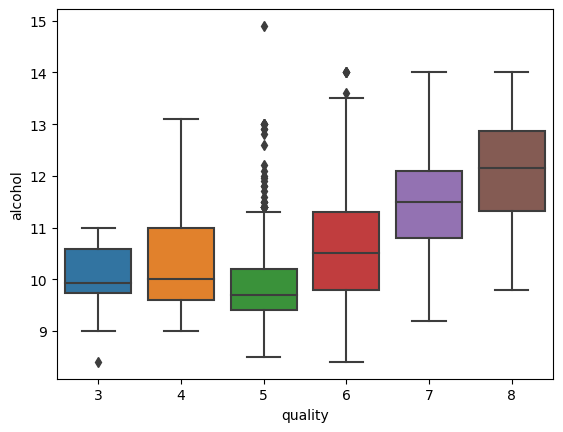

In [45]:
sns.boxplot(x="quality", y="alcohol", data=df_red)

In [48]:
df_red[["quality","alcohol"]].corr()

,quality,alcohol
quality,1.000000,0.476166
alcohol,0.476166,1.000000


podemos observar que la tendencia es a tener una mejor calidad cuando hay mayor presencia de alcohol para el vino rojo aunque la correlación es baja

Para el vino blanco

<Axes: xlabel='quality', ylabel='alcohol'>

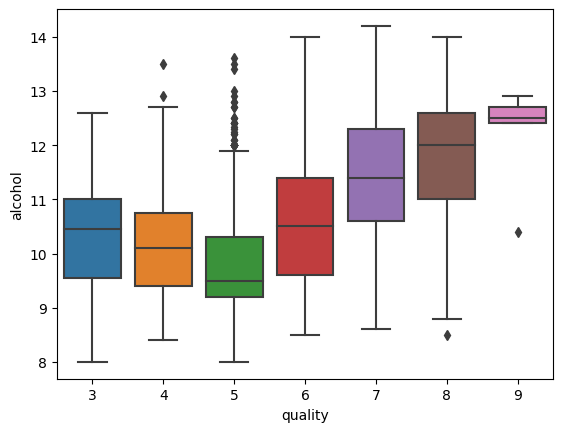

In [46]:
sns.boxplot(x="quality", y="alcohol", data=df_white)

In [47]:
df_white[["quality","alcohol"]].corr()

,quality,alcohol
quality,1.000000,0.435575
alcohol,0.435575,1.000000


Para el vino blanco podemos encontrar una tendencia bastante similar aunque si observamos la correlación es baja

Ahora revisaremos las calidades de nuestros vinos en los data sets

In [49]:
df_red['quality-binned'].value_counts()

Medium    1319
High       217
Low         63
Name: quality-binned, dtype: int64

tenemos una gran cantidad de vinos rojos de mediana calidad como podemos observar

In [51]:
df_white['quality-binned'].value_counts()

Medium    3078
Low       1640
High       180
Name: quality-binned, dtype: int64

Para los vinos blancos tenemos una gran cantidad de vinos de mediana calidad a la vez que una gran cantidad de vinos de baja calidad

Ahora veremos el pH promedio para agrupado por las calidades de lo vinos

In [53]:
df_gp1 = df_red[['quality-binned','pH']]
grouped_quality1 = df_gp1.groupby(['quality-binned'],as_index= False).mean()
grouped_quality1

,quality-binned,pH
0,Low,3.384127
1,Medium,3.311296
2,High,3.288802


para el vino rojo podemos observar que el ph promedio es bastante similar sin embargo tiene una tendencia a bajar cuando la calidad es más alta

In [54]:
df_gp2 = df_white[['quality-binned','pH']]
grouped_quality2 = df_gp2.groupby(['quality-binned'],as_index= False).mean()
grouped_quality2

,quality-binned,pH
0,Low,3.170457
1,Medium,3.195832
2,High,3.221167


Para el vino blanco podemos ver que se presenta lo opuesto al vino rojo, en este caso tiene una tendencia a aumentar el nivel del pH cuando los vinos son de mayor calidad

In [55]:
from scipy import stats

In [56]:
pearson_coef1, p_value1 = stats.pearsonr(df_red['fixed acidity'], df_red['citric acid'])
print("The Pearson Correlation Coefficient is", pearson_coef1, " with a P-value of P =", p_value1)  

The Pearson Correlation Coefficient is 0.6717034347641068  with a P-value of P = 2.535321061814953e-210


como el p-value es < 0,0001, la correlación entre la acidez fija y el acido citrico es estadisticamente significante pero la relación linear no es demasiado fuerte, esto para el vino rojo

In [57]:
pearson_coef2, p_value2 = stats.pearsonr(df_white['fixed acidity'], df_white['citric acid'])
print("The Pearson Correlation Coefficient is", pearson_coef2, " with a P-value of P =", p_value2)  

The Pearson Correlation Coefficient is 0.2891806976936753  with a P-value of P = 5.618012118341047e-95


como el p-value es < 0,0001, la correlación entre la acidez fija y el acido citrico es estadisticamente significante pero la relación linear no es demasiado fuerte, esto para el vino blanco